In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 


In [2]:
FundAUM=1e9
mkts=get_market_list()
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

# Charts for email to be sent once data is gathered and signals calculated

In [3]:
lots=calc_positions_two_lookbacks(10,40,mkts,df,FundAUM).dropna(how='all')

model.py:8: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=40,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:16: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(25

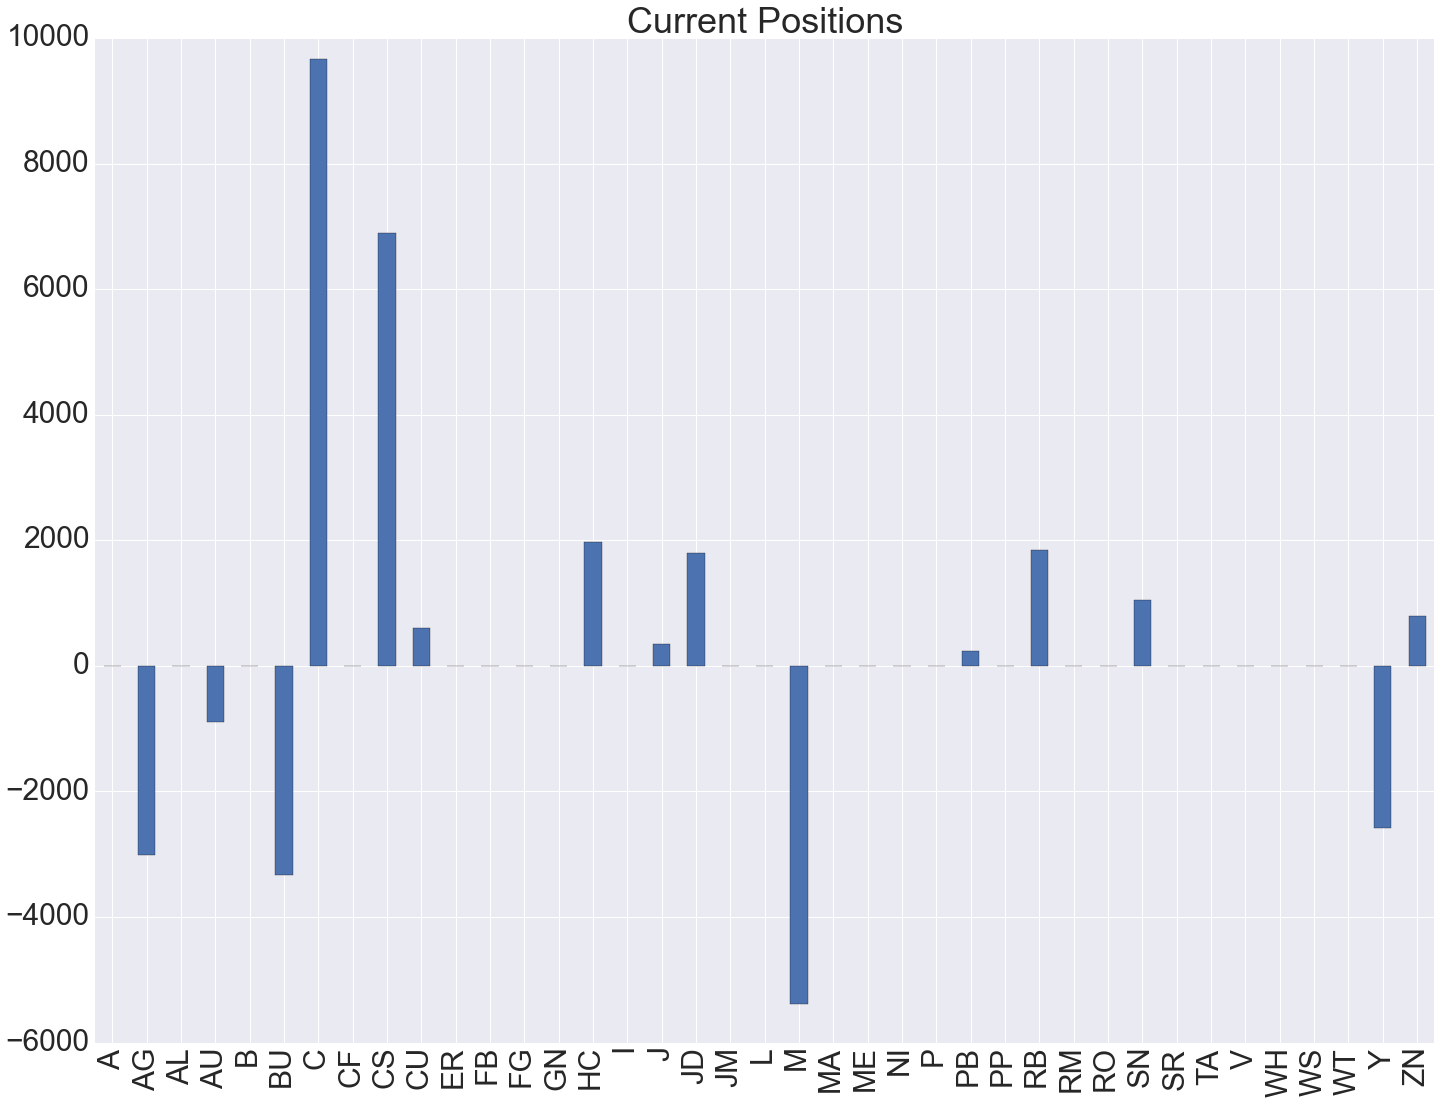

In [4]:
lots.ix[lots.index[-1]].plot(kind='bar',title='Current Positions')

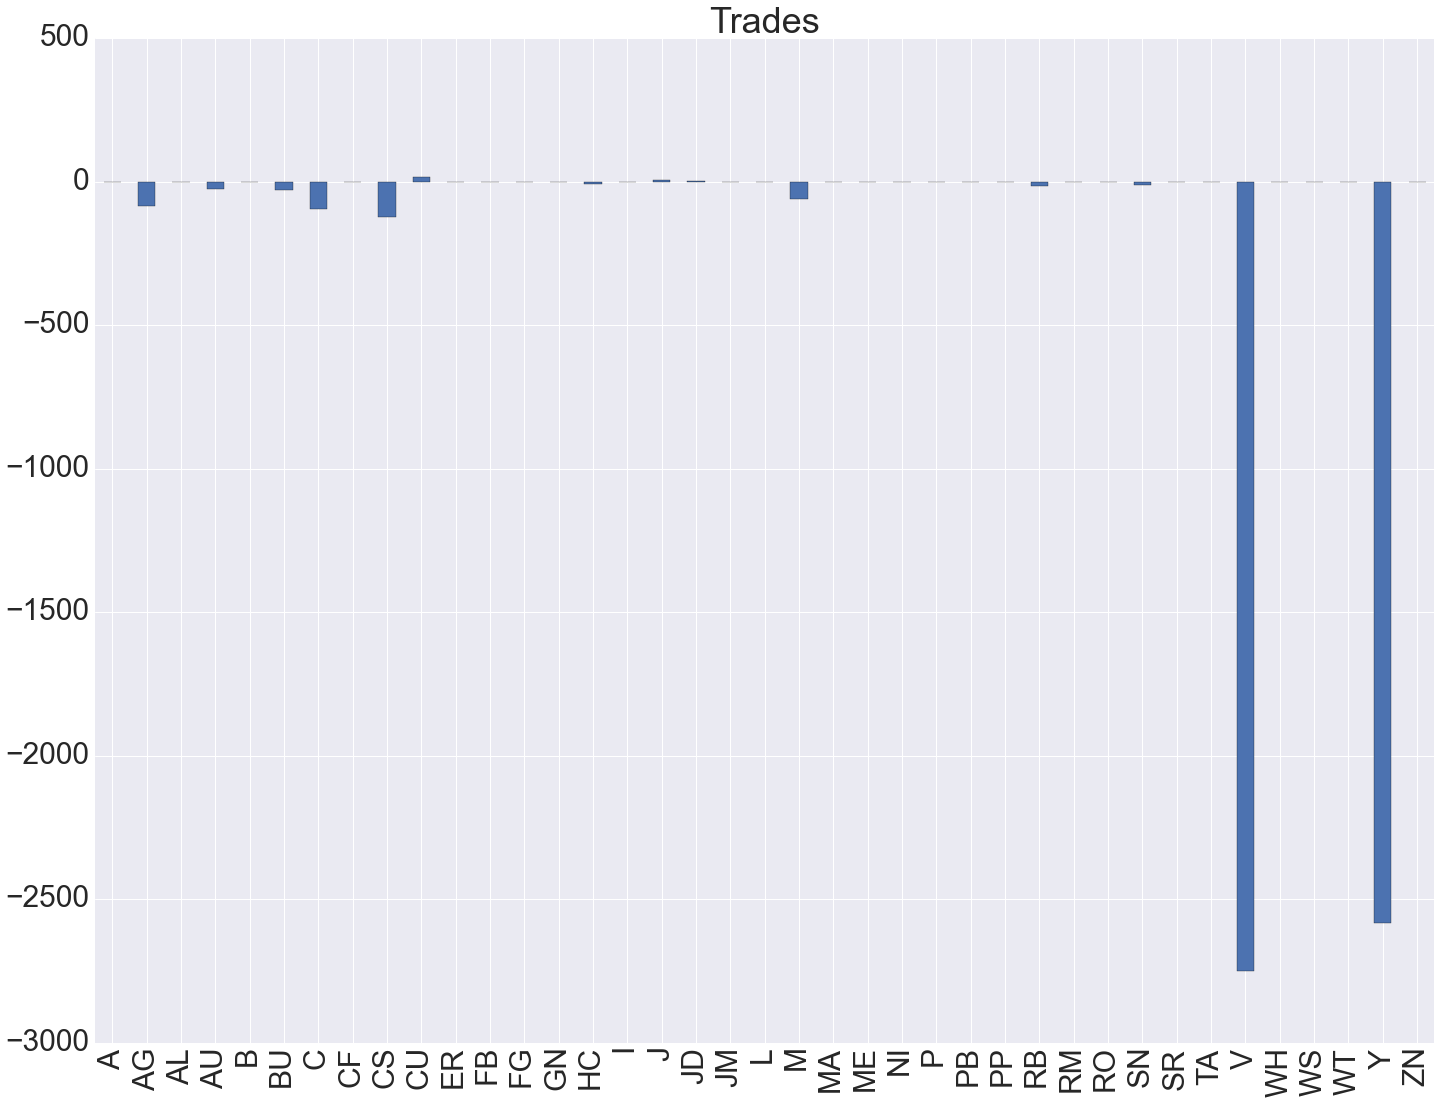

In [5]:
lots.diff().ix[lots.index[-1]].plot(kind='bar',title='Trades')

In [6]:
curr_px=get_most_liquid_price(mkts)
PNL = calc_pnl_position_wc(lots,df,curr_px)

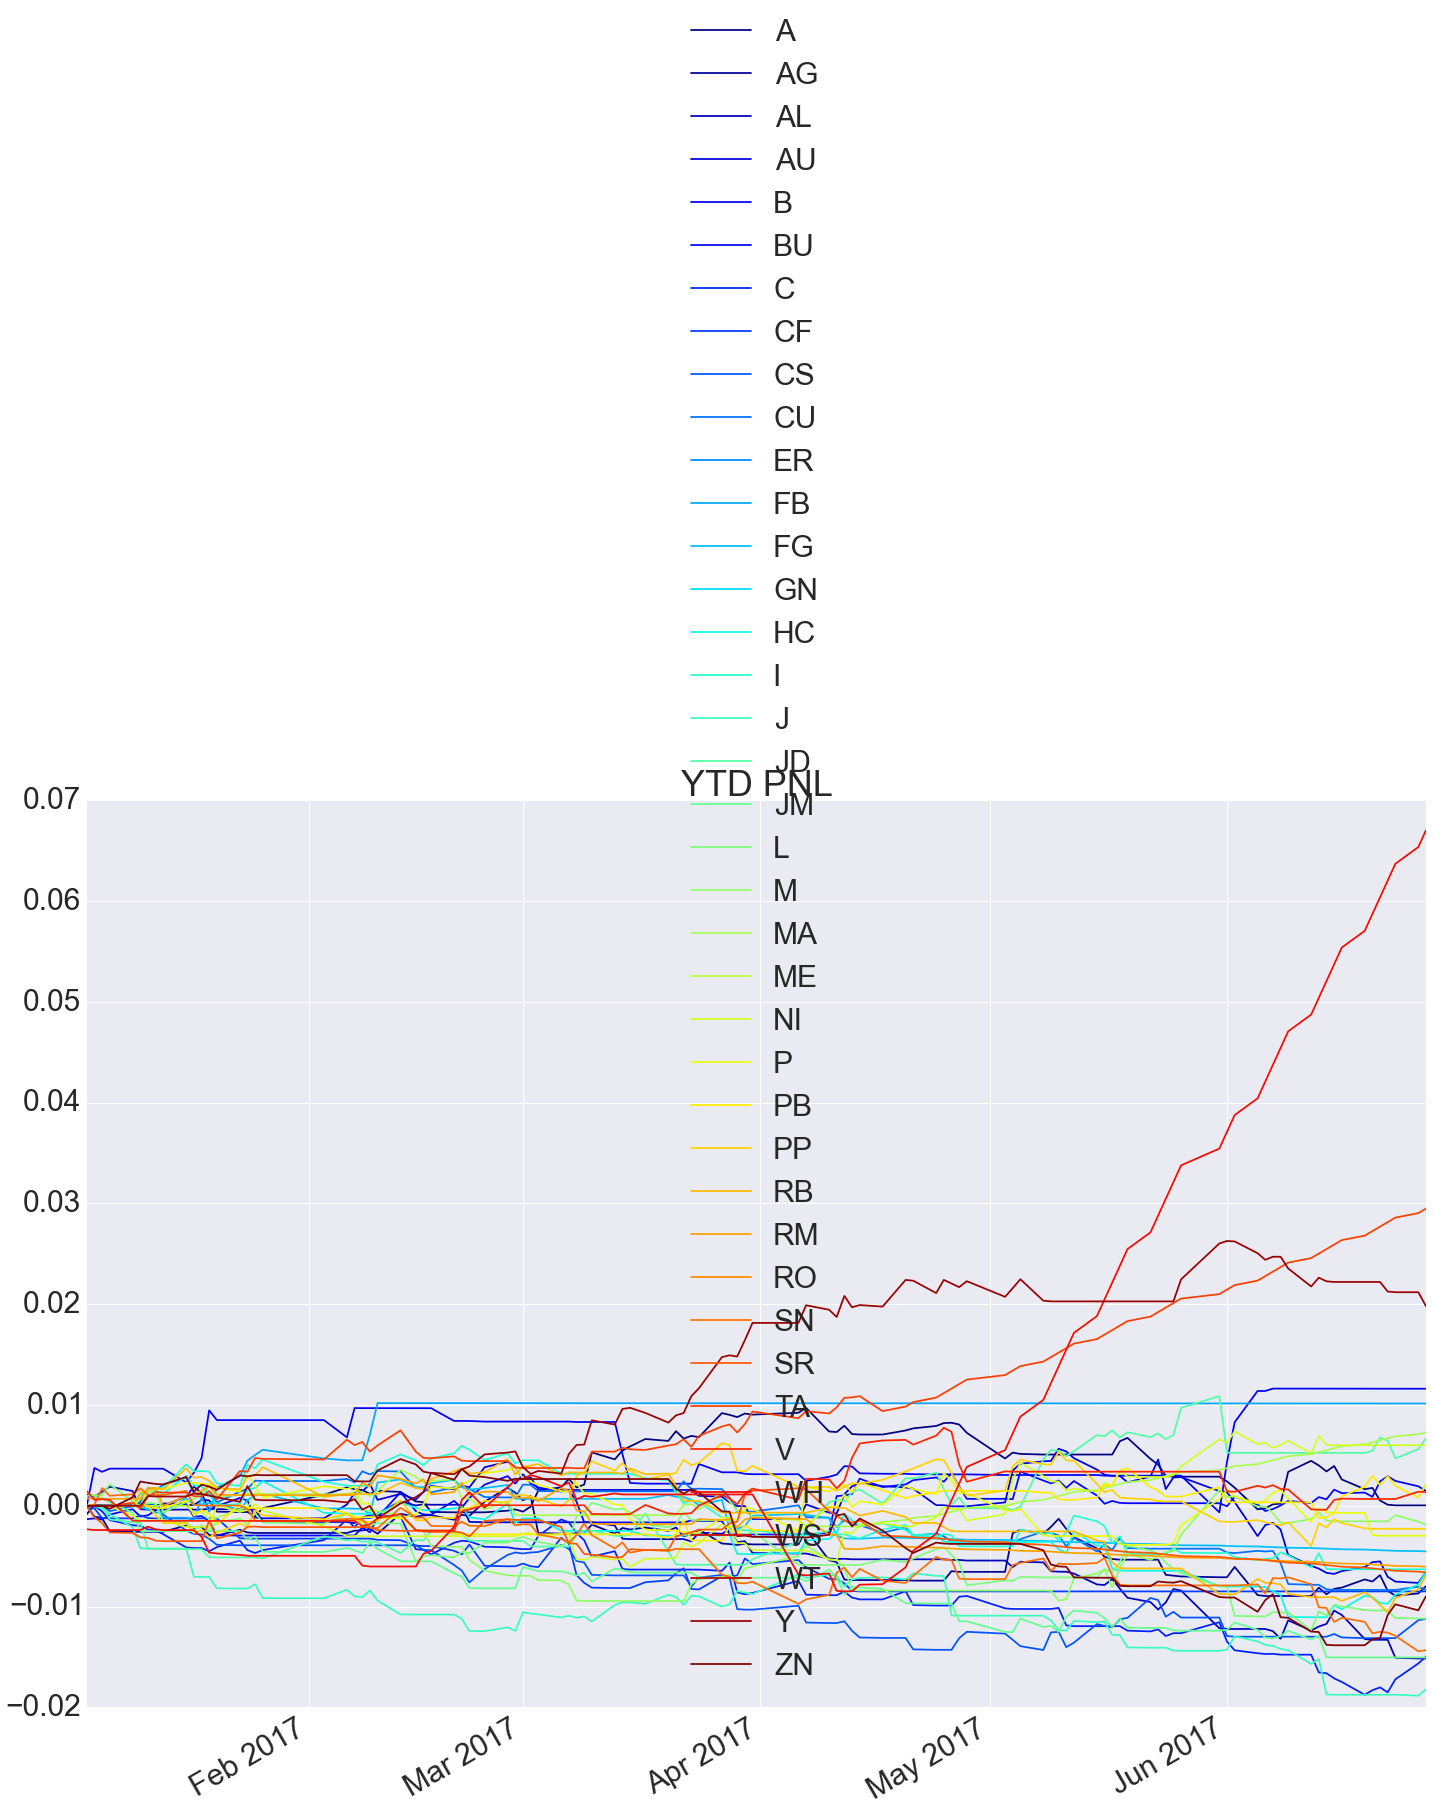

In [7]:
(PNL['2017':].dropna(how='all').ffill()/FundAUM).cumsum().plot(colormap='jet',title='YTD PNL')

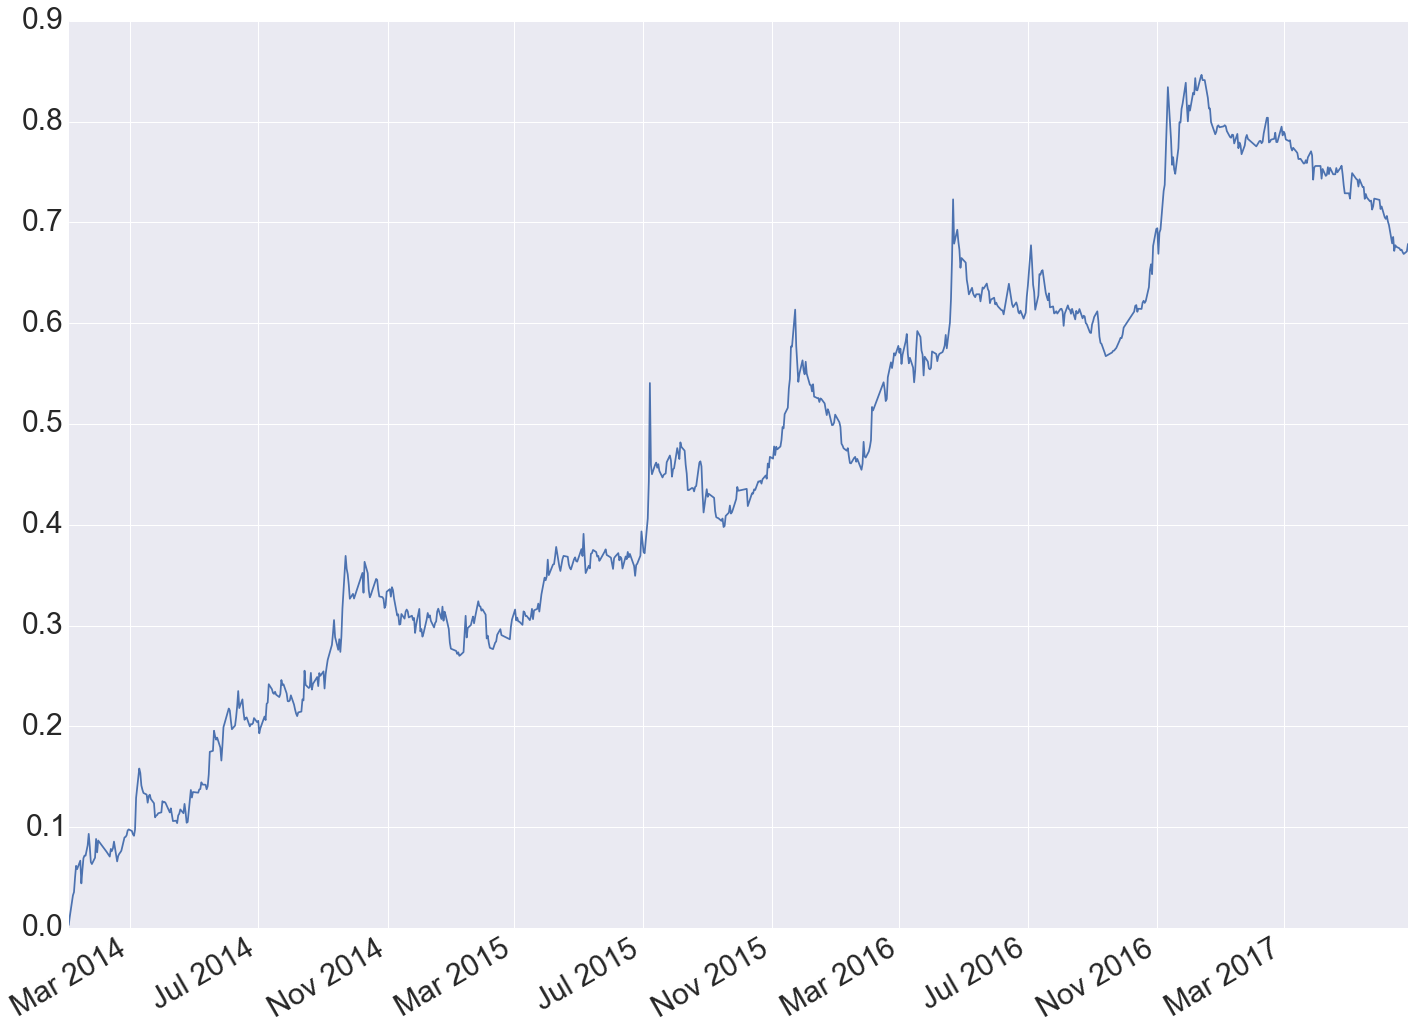

In [23]:
(PNL['2014':].sum(axis=1)/FundAUM).cumsum().plot()

In [24]:
calc_Sharpe((PNL['2014':].sum(axis=1)/FundAUM))

1.1038783652790234